## Final Project Submission

Please fill out:
* Student name: Nyla Duperval
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding ='latin1')
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col='movie') 

In [4]:
tn_budgets.dtypes

id                    int64
release_date         object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [5]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
#Changed dtype to complete 

In [8]:
tn_budgets['release_date'] = tn_budgets['release_date'].str.replace(',', '')
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
#Changed dtype for release date

In [29]:
tn_budgets['year_of_release'] = pd.to_datetime(tn_budgets['release_date'].map(lambda x: x.strftime('%Y')))

#Created new column holding year of release. 

In [30]:
tn_budgets.dtypes

id                            int64
release_date         datetime64[ns]
production_budget             int32
domestic_gross                int32
worldwide_gross             float64
year_of_release      datetime64[ns]
dtype: object

In [31]:
mark = (tn_budgets['domestic_gross'] > 0) & (tn_budgets['worldwide_gross'] > 0 ) 
new_df = tn_budgets[mark]
new_df
#New df has only movies with domestic and worldwide gross greater than 0

,id,release_date,production_budget,domestic_gross,worldwide_gross,year_of_release
movie,,,,,,
Avatar,1,2009-12-18,425000000,760507625,2.776345e+09,2009-01-01
Pirates of the Caribbean: On Stranger Tides,2,2011-05-20,410600000,241063875,1.045664e+09,2011-01-01
Dark Phoenix,3,2019-06-07,350000000,42762350,1.497624e+08,2019-01-01
Avengers: Age of Ultron,4,2015-05-01,330600000,459005868,1.403014e+09,2015-01-01
Star Wars Ep. VIII: The Last Jedi,5,2017-12-15,317000000,620181382,1.316722e+09,2017-01-01
...,...,...,...,...,...,...
Cavite,76,2006-05-26,7000,70071,7.164400e+04,2006-01-01
The Mongol King,77,2004-12-31,7000,900,9.000000e+02,2004-01-01
Following,79,1999-04-02,6000,48482,2.404950e+05,1999-01-01


In [32]:
new_df= new_df.drop('id', 1) #Removes id column

In [33]:
movie_gross = new_df[(new_df['year_of_release'] >= '2010') & (new_df['year_of_release'] <= '2020')]
movie_gross
#Created a df with movies with year of release between 2010-2020

,release_date,production_budget,domestic_gross,worldwide_gross,year_of_release
movie,,,,,
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1.045664e+09,2011-01-01
Dark Phoenix,2019-06-07,350000000,42762350,1.497624e+08,2019-01-01
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1.403014e+09,2015-01-01
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1.316722e+09,2017-01-01
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2.053311e+09,2015-01-01
...,...,...,...,...,...
Krisha,2016-03-18,30000,144822,1.448220e+05,2016-01-01
Down Terrace,2010-10-15,30000,9812,9.812000e+03,2010-01-01
Emily,2017-01-27,27000,3547,3.547000e+03,2017-01-01


In [43]:
grouped = movie_gross.groupby('year_of_release').size()
grouped

year_of_release
2010-01-01    246
2011-01-01    227
2012-01-01    200
2013-01-01    193
2014-01-01    191
2015-01-01    208
2016-01-01    192
2017-01-01    149
2018-01-01    137
2019-01-01     44
dtype: int64

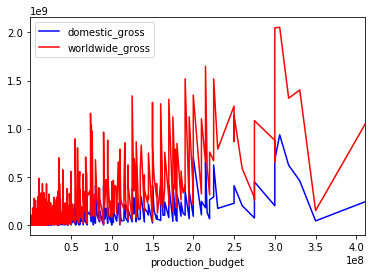

In [41]:
ax = plt.gca()

movie_gross.plot(kind = 'line', x = 'production_budget', y = 'domestic_gross', color = 'blue', ax=ax)
movie_gross.plot(kind = 'line', x = 'production_budget', y = 'worldwide_gross', color = 'red', ax=ax)

plt.show()